# Линейная алгебра. Часть II

## Неоднородные СЛАУ
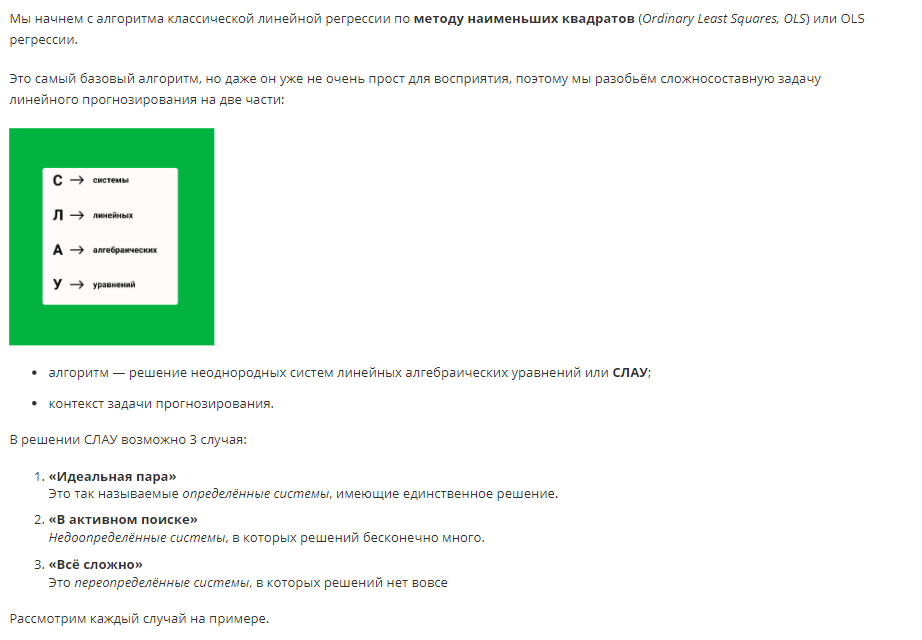

# Случай «Идеальная пара»
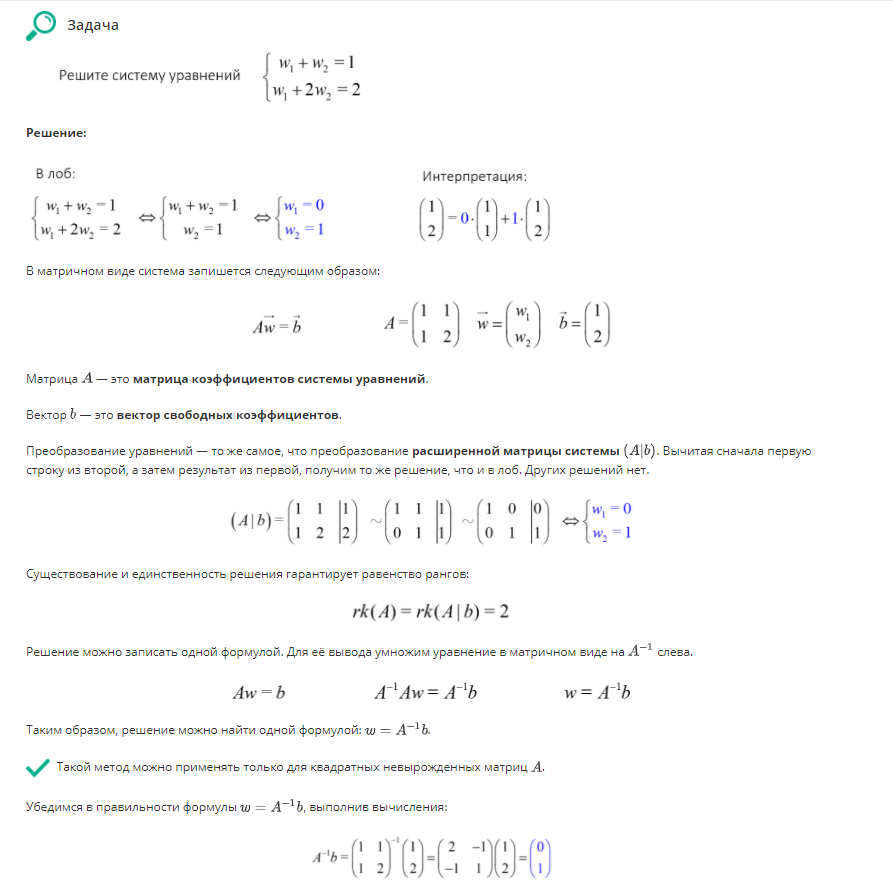

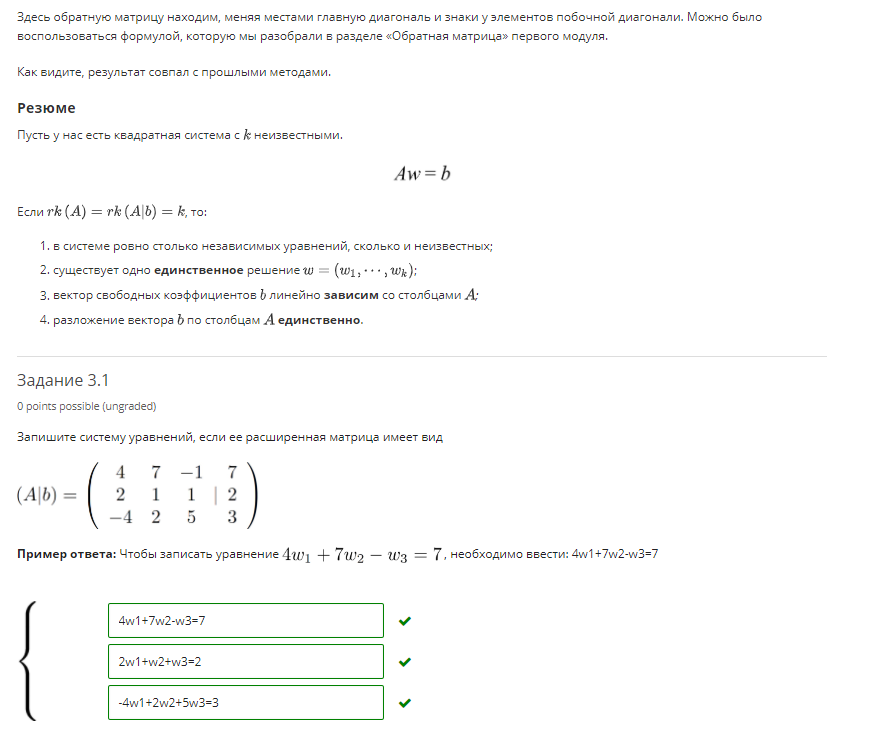

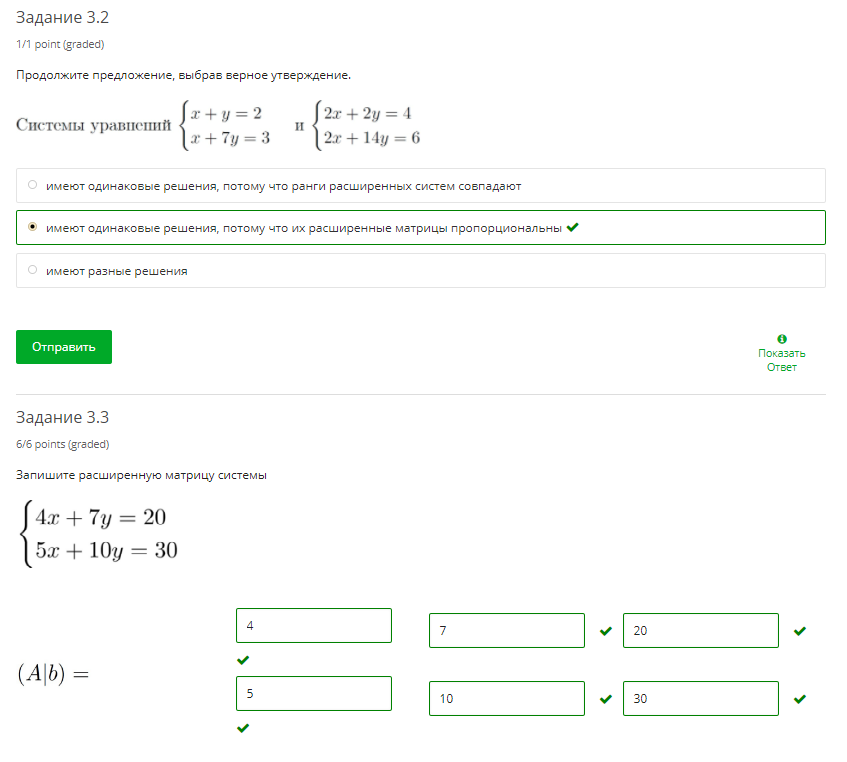

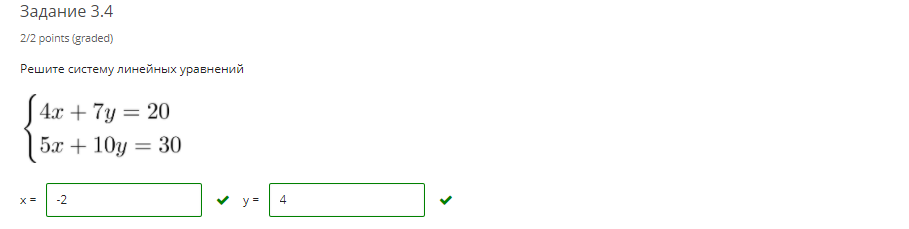

## Случай «В активном поиске»
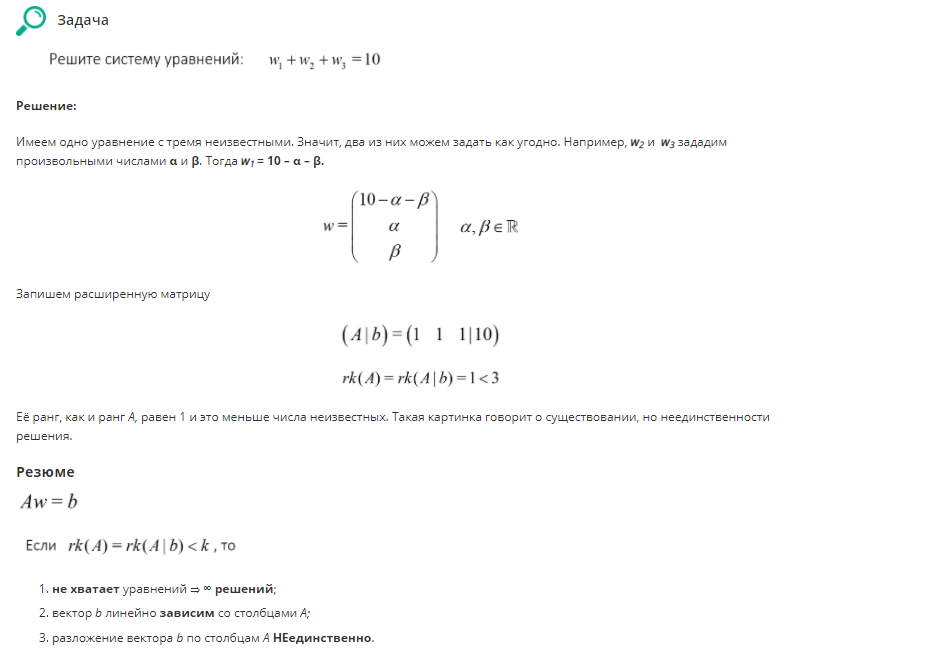

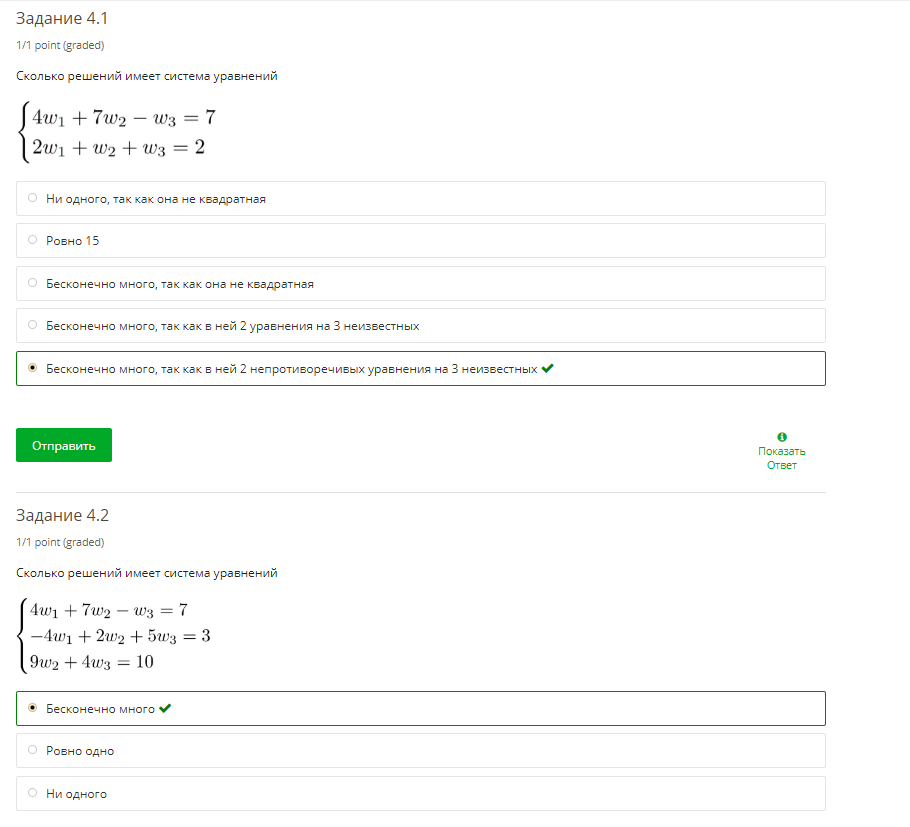

## Случай «Всё сложно»
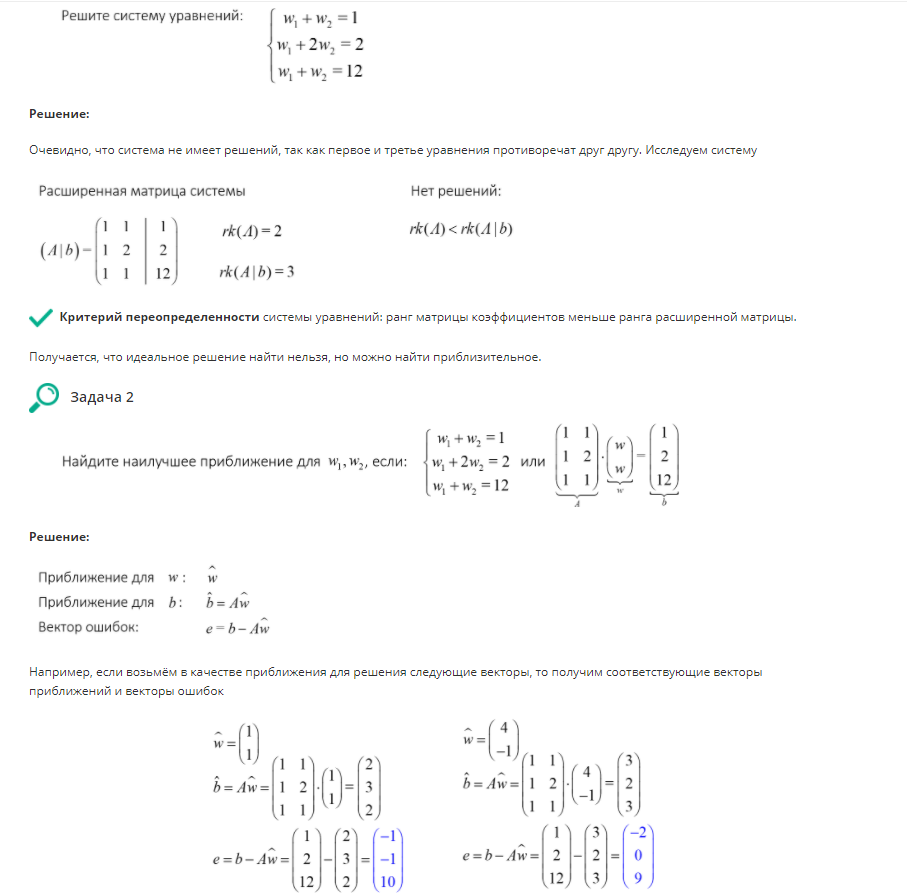

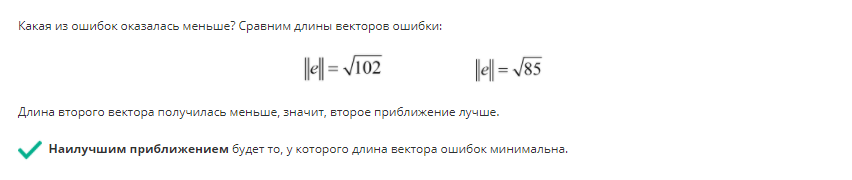

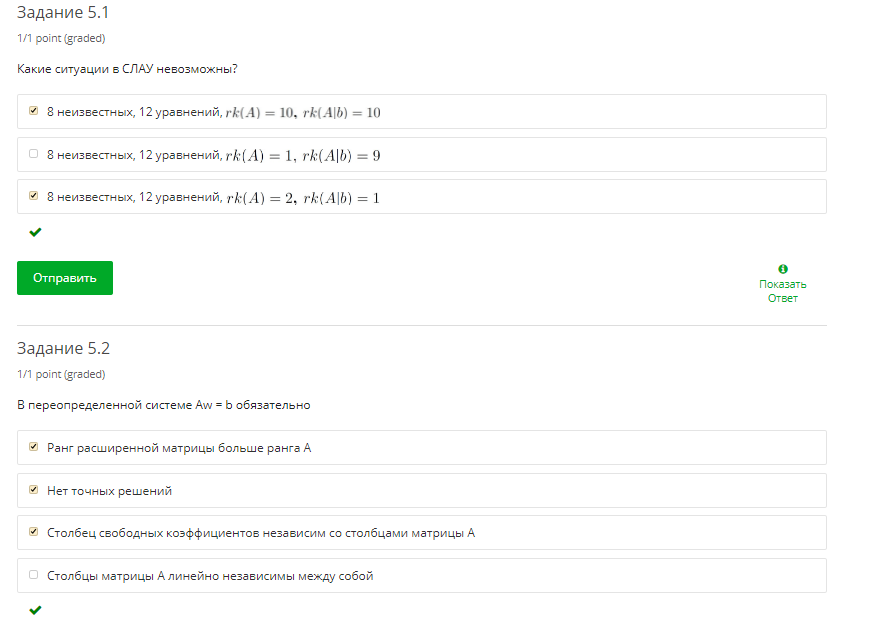

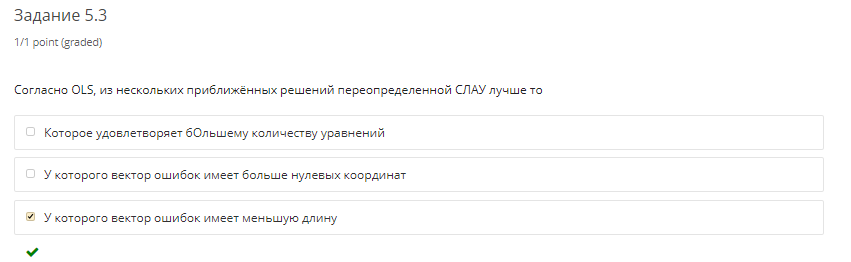

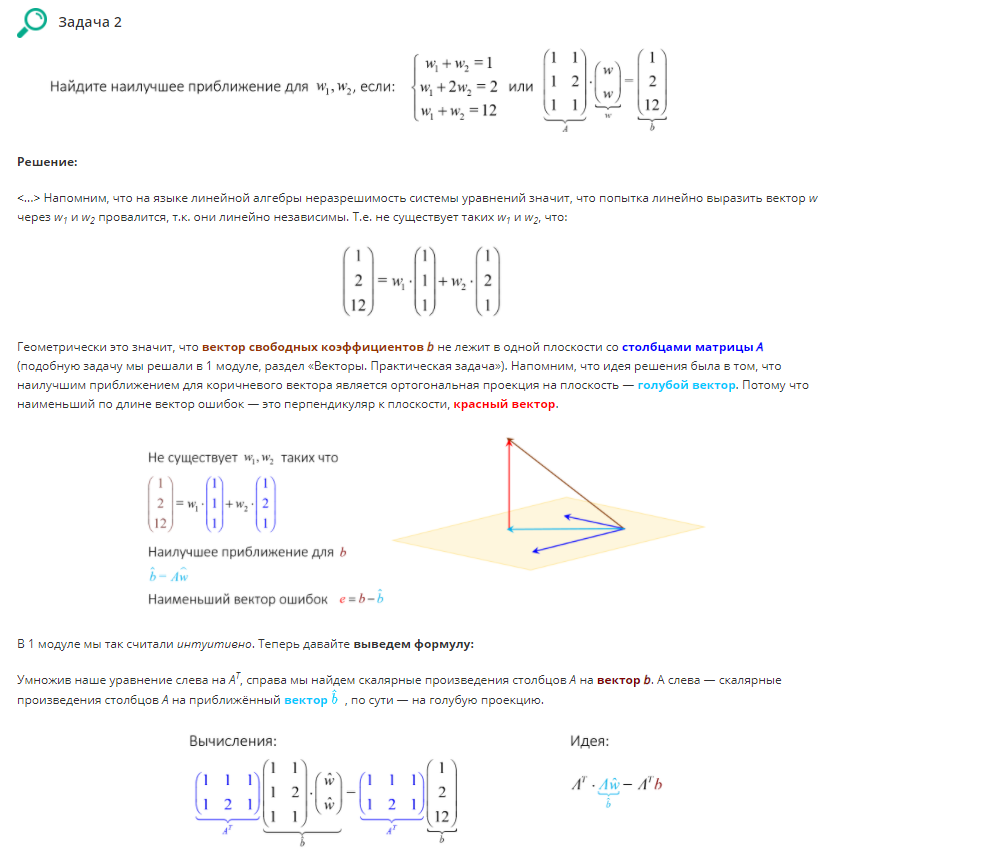

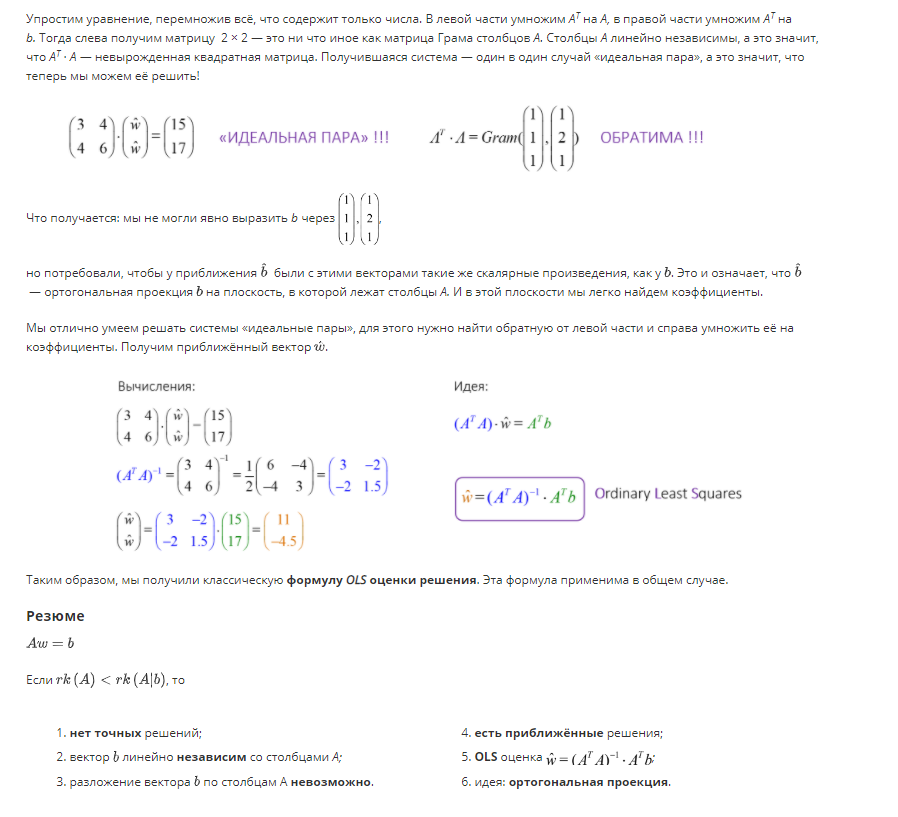

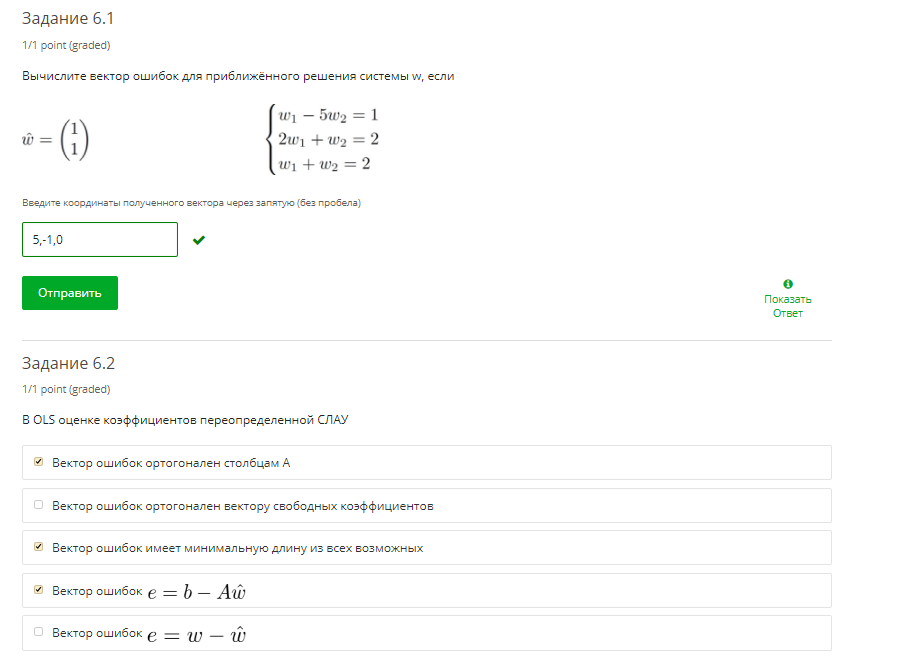

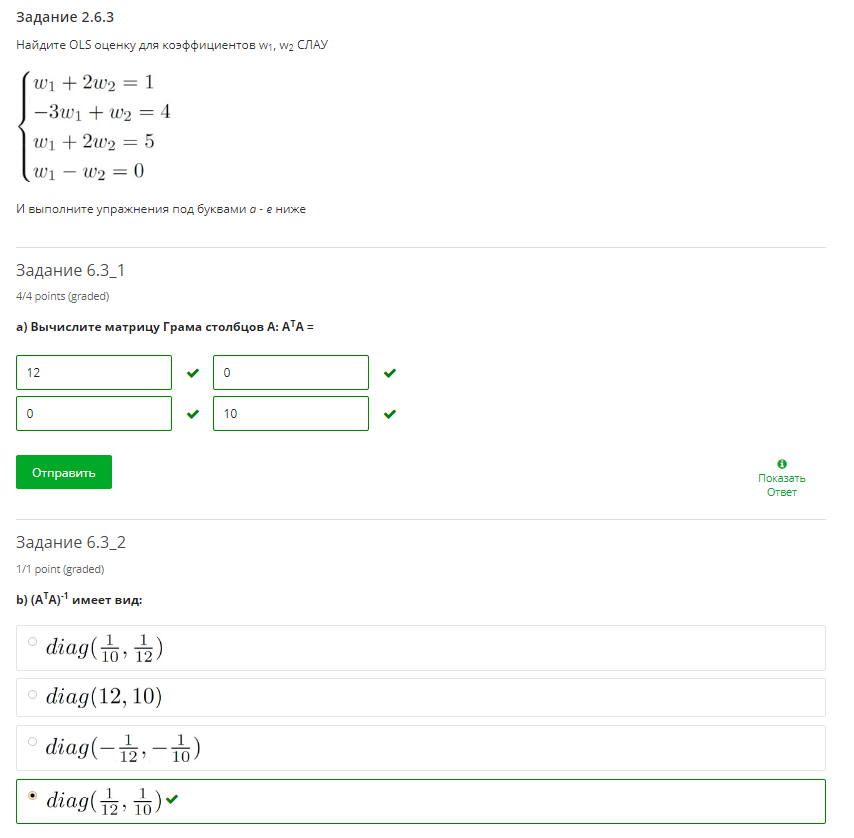

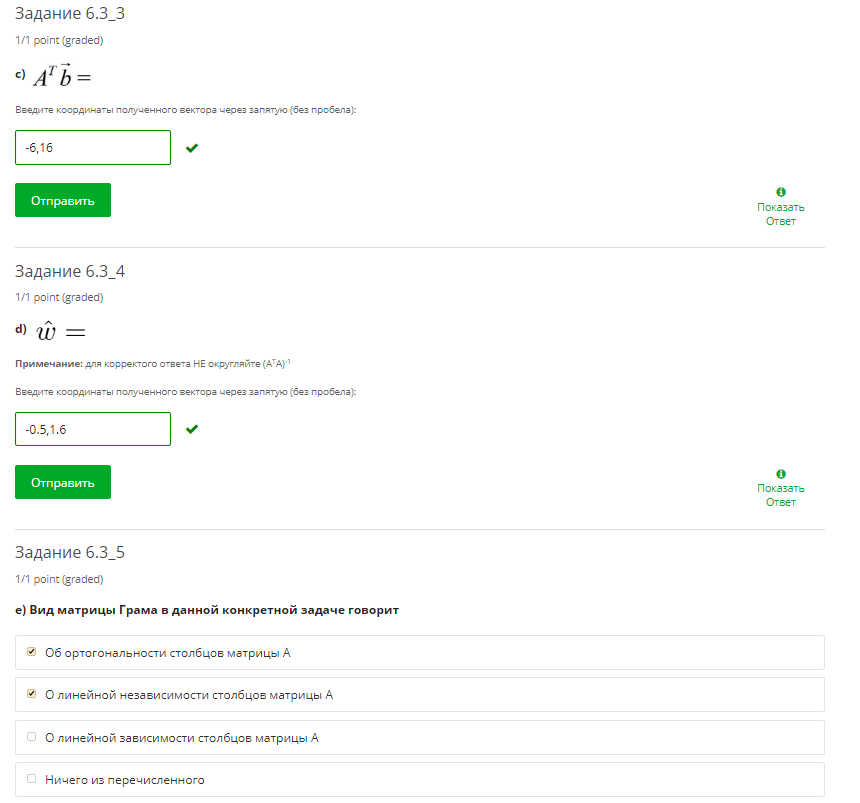

# Классическая OLS линейная регрессия

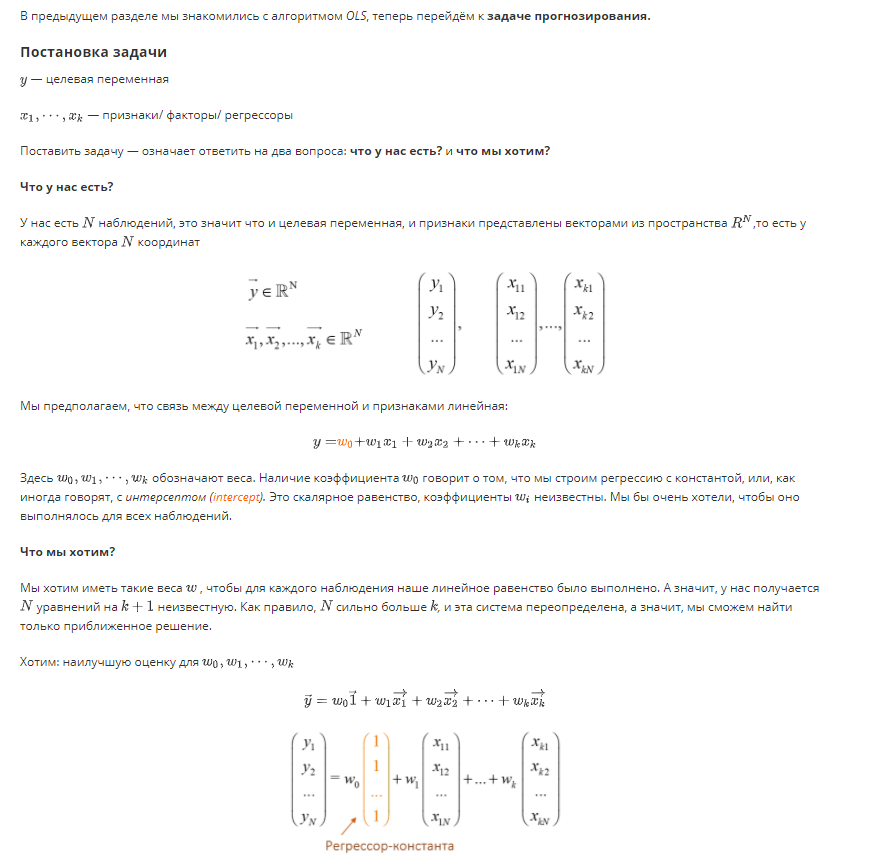

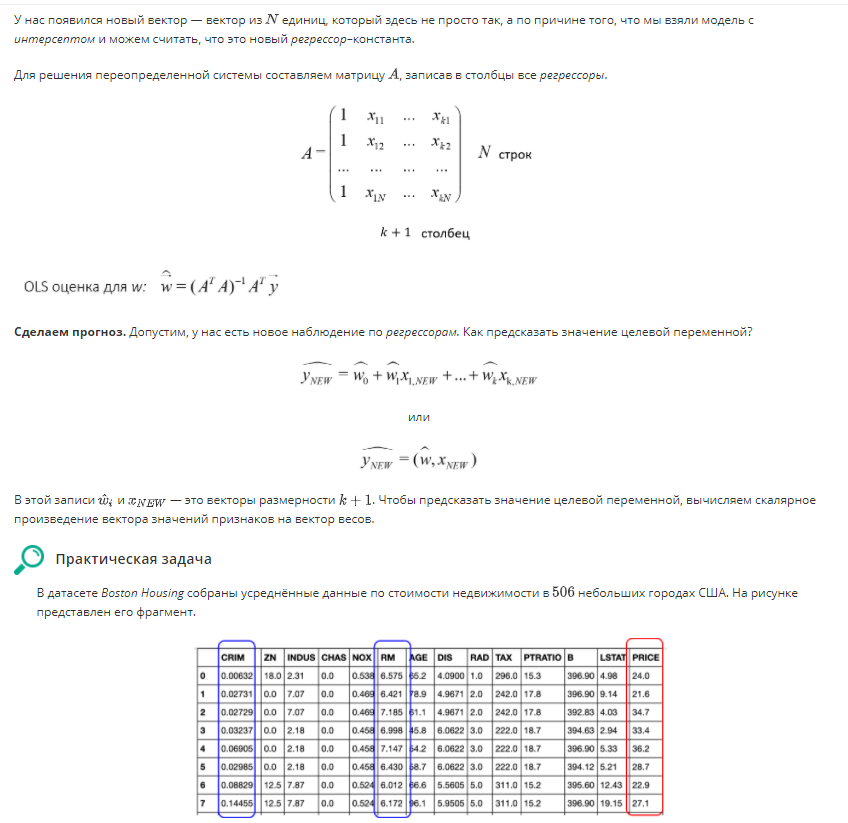

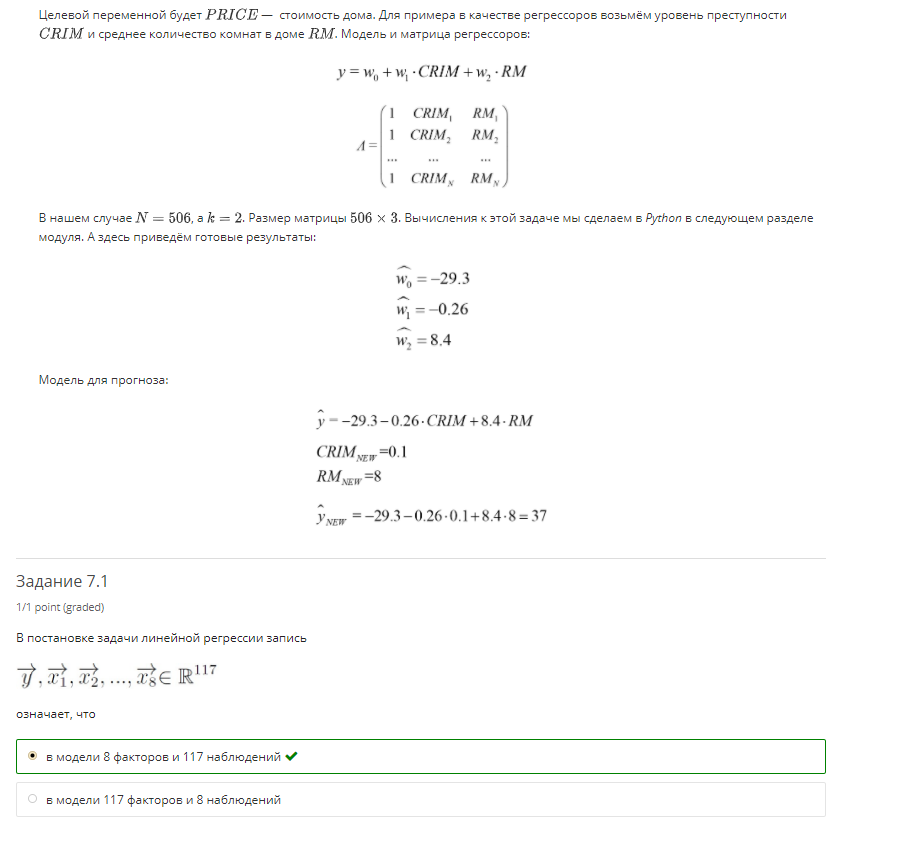

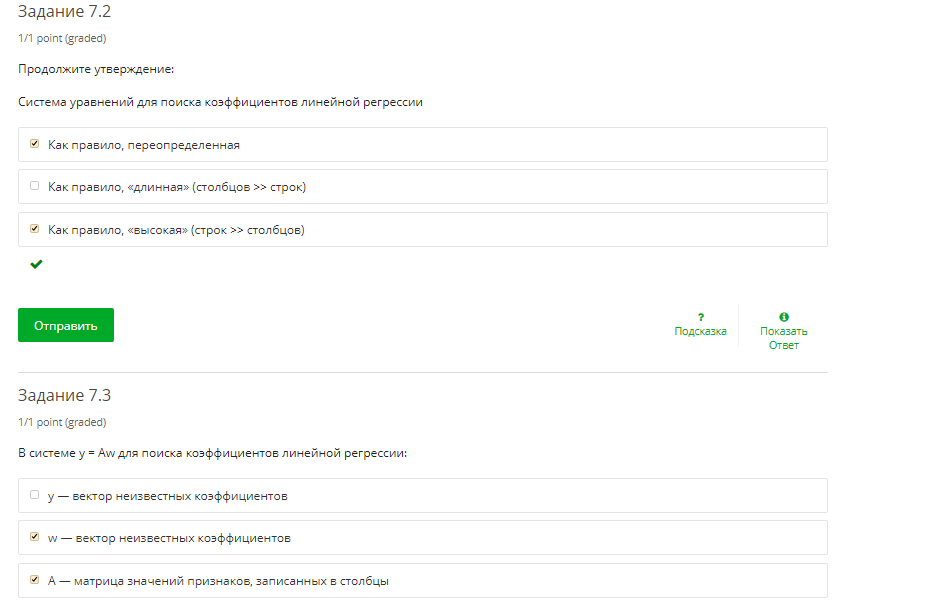

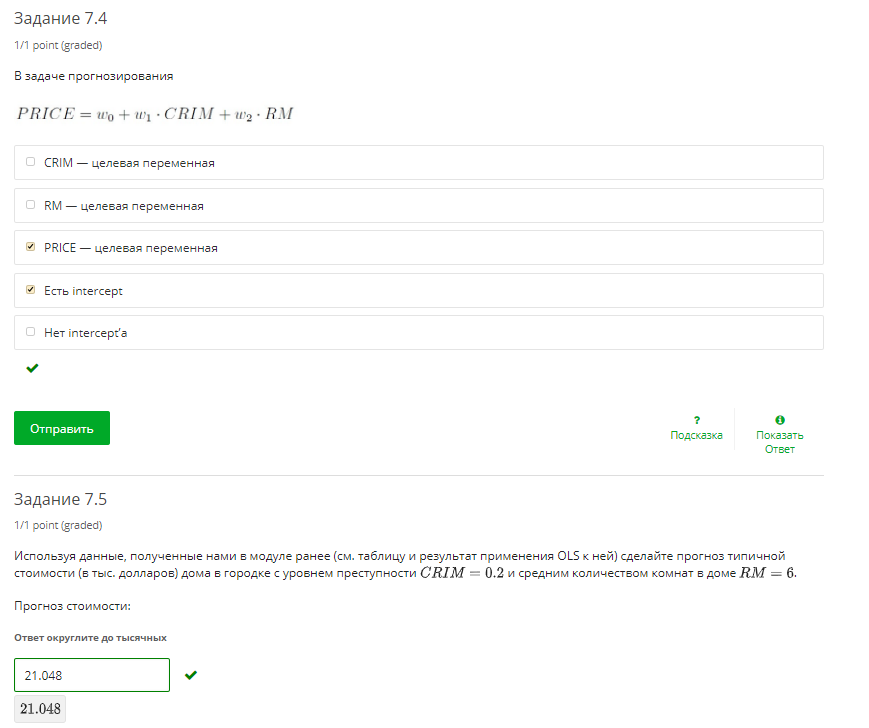

# Проблемы в классической OLS модели
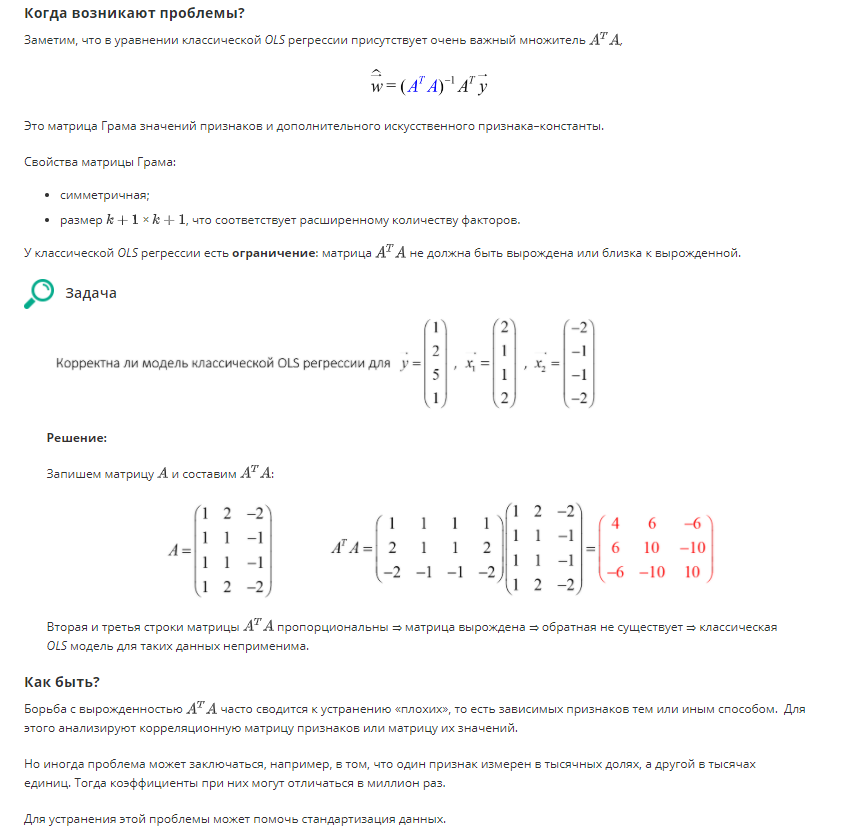

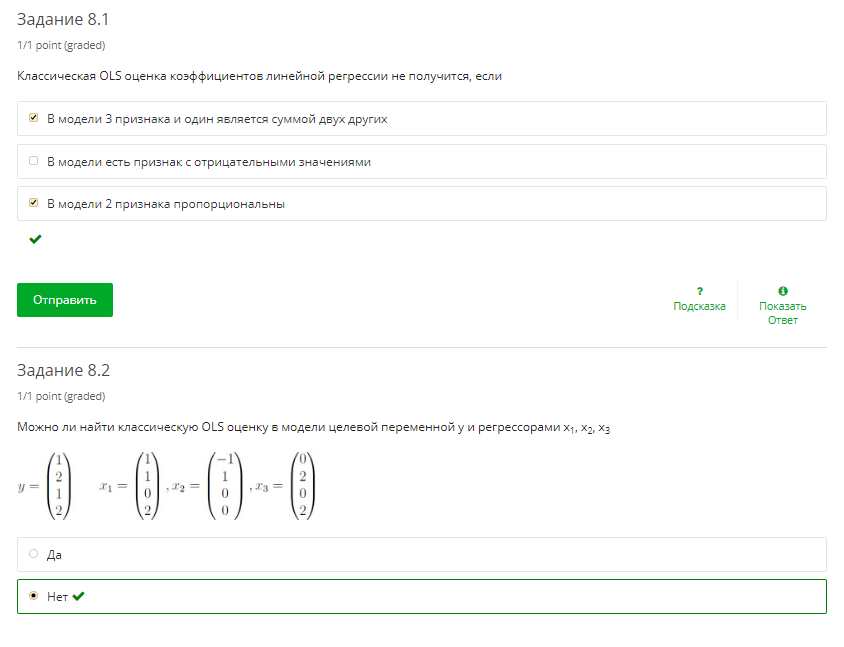

#  Стандартизация признаков
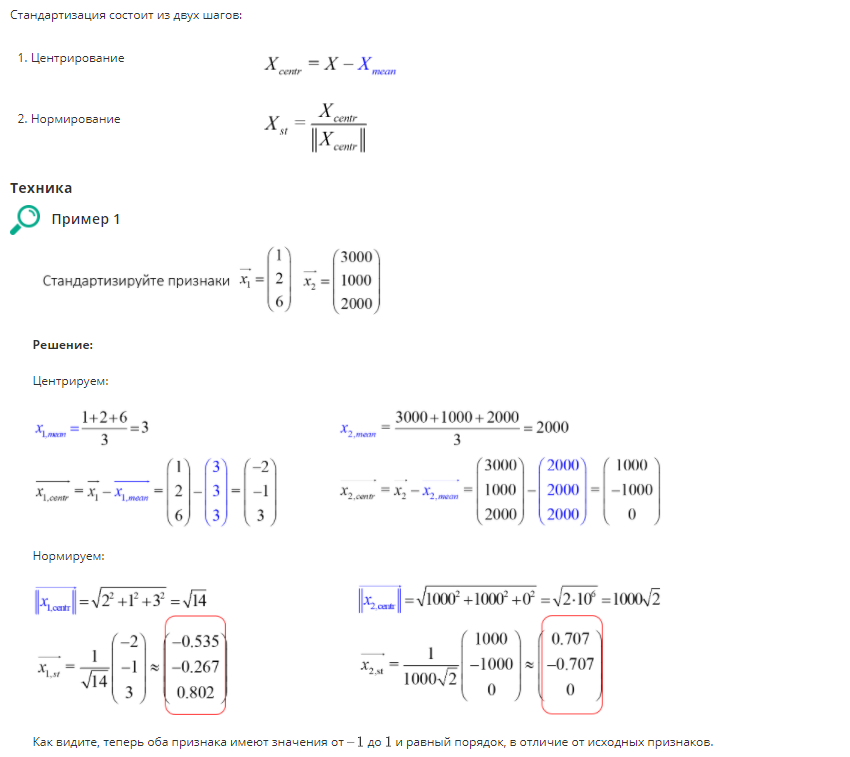

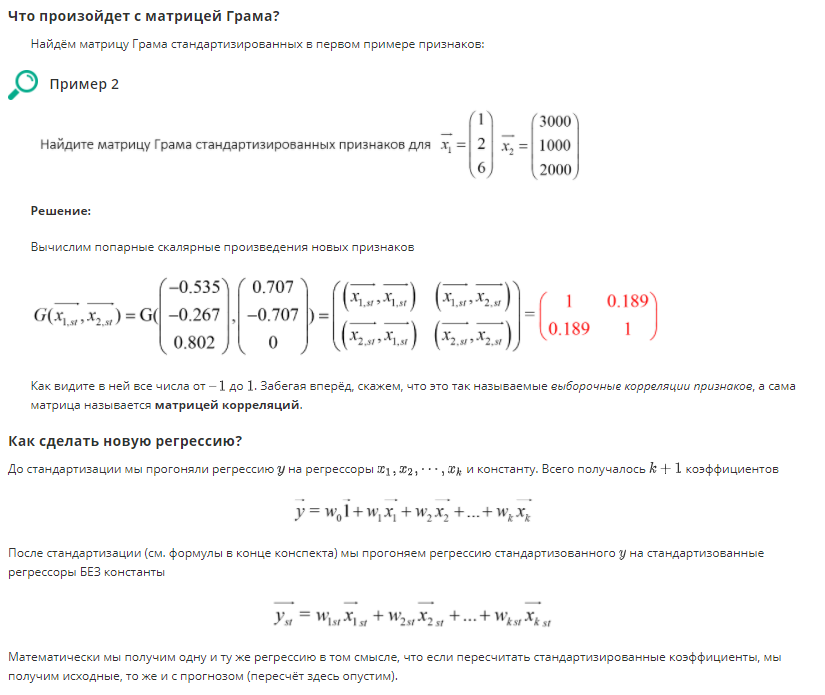

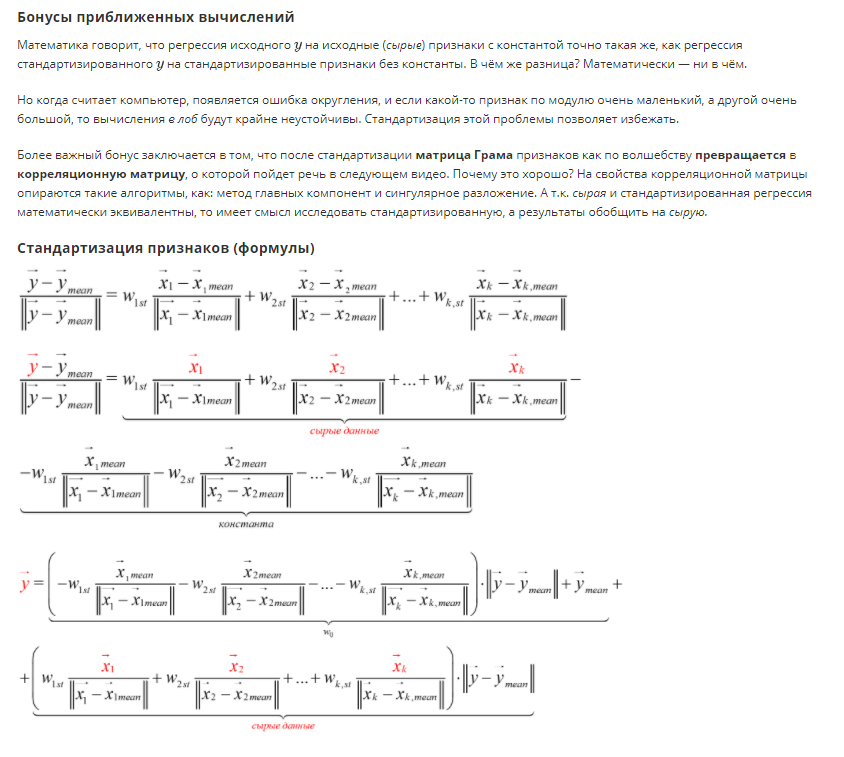

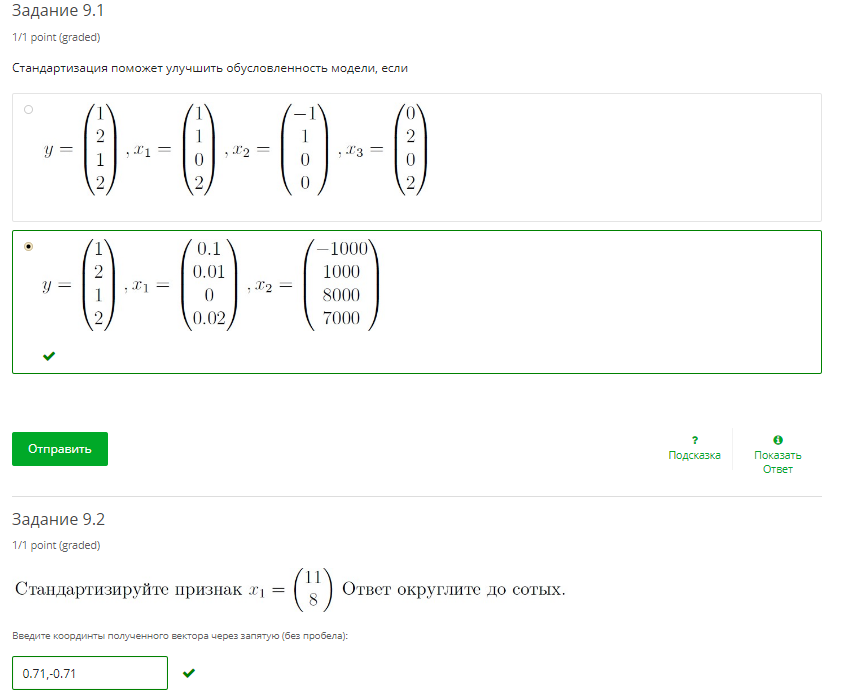

# Корреляционная матрица
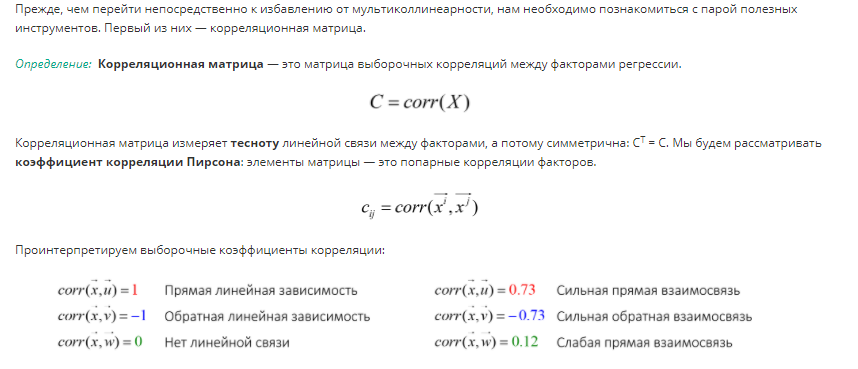

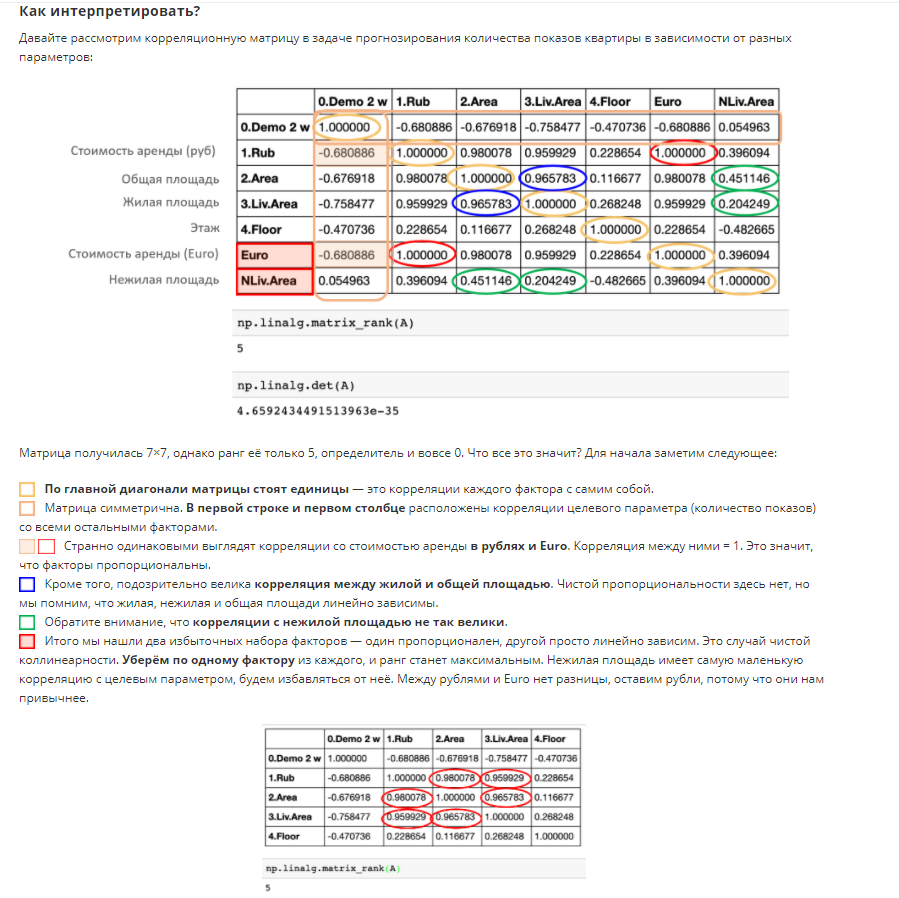

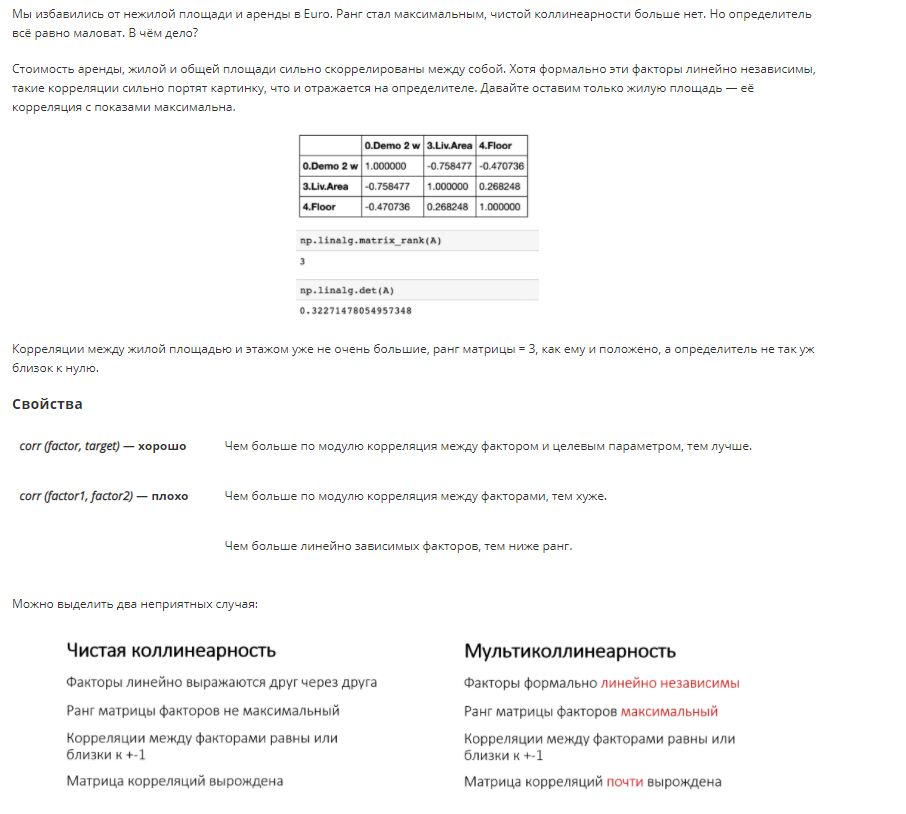

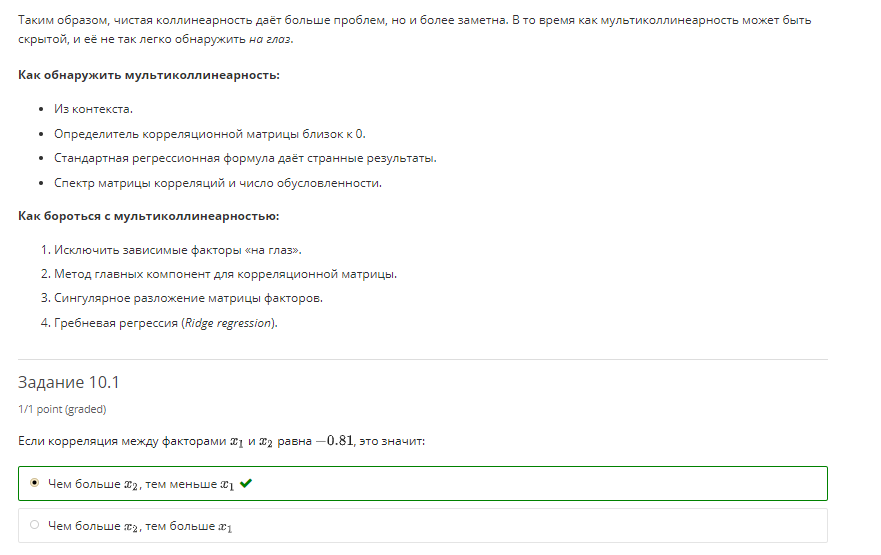

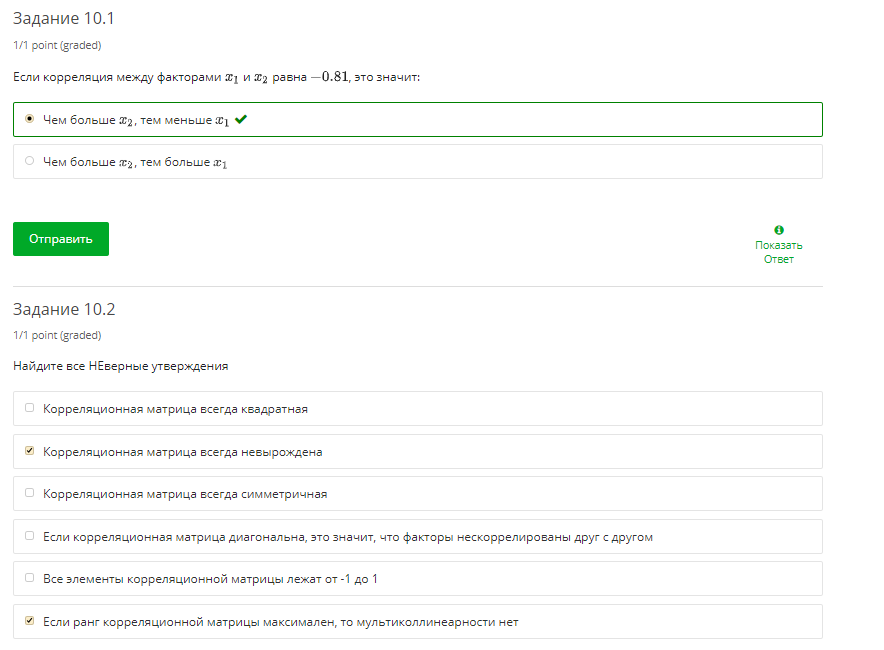

# Практика. Классический OLS алгоритм

In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

# Хотим узнать, как обращаться к столбцам bostonDF
print(bostonDF.columns)
# полная матрица корреляций
# используем метод Pandas corr()
C = bostonDF.corr(method='pearson')
C



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

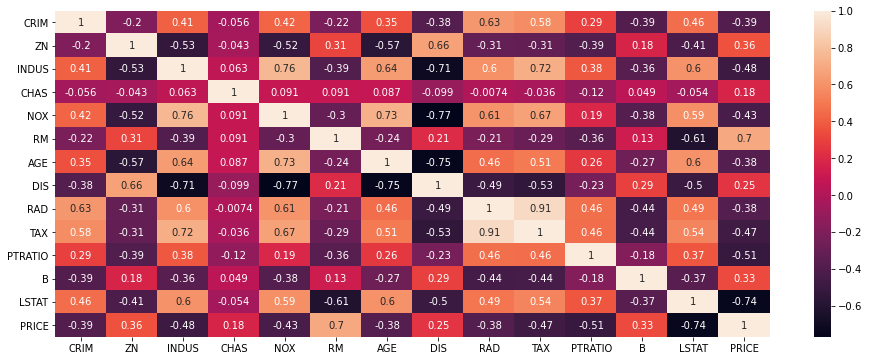

In [2]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

In [7]:
# Строим регрессию
Data=bostonDF[['CRIM','RM']]
print(np.shape(Data))

# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
CRIM=Data['CRIM']
RM= Data['RM']
A= np.column_stack((np.ones(506), CRIM, RM))
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
print(A)
# Создаем целевой вектор
y=bostonDF[['PRICE']] # объект типа dataframe - то, что нужно
y_s = bostonDF['PRICE'] #  объект типа series - не подойдет
print('type(y)',type(y))
print('type(y_s)',type(y_s))
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print('OLS оценка для коэффициентов',w_hat)

# прогноз
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# делаем прогноз типичной соимости дома
PRICE_new=w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
# короткий способ сделать прогноз
new=np.array([1,CRIM_new,RM_new])
print('Прогноз для CRIM_new=0.1, RM_new=8',PRICE_new,new@w_hat)

(506, 2)
[[1.      0.00632 6.575  ]
 [1.      0.02731 6.421  ]
 [1.      0.02729 7.185  ]
 ...
 [1.      0.06076 6.976  ]
 [1.      0.10959 6.794  ]
 [1.      0.04741 6.03   ]]
type(y) <class 'pandas.core.frame.DataFrame'>
type(y_s) <class 'pandas.core.series.Series'>
OLS оценка для коэффициентов        PRICE
0 -29.244719
1  -0.264913
2   8.391068
Прогноз для CRIM_new=0.1, RM_new=8 PRICE    37.857335
dtype: float64 PRICE    37.857335
dtype: float64


In [8]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,y,rcond=None)

(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

Стандартизация данных

In [9]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanCRIM = Data['CRIM'].mean()
meanRM  = Data['RM'].mean()
mean_y = y.mean()
print('mean value of CRIME:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of PRICE:', mean_y)

# Центрирование
CRIM_c = Data['CRIM'] - meanCRIM
RM_c = Data['RM'] - meanRM
y_c = y - mean_y
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))
print('среднее арифметическое вектора CRIM после центрирования:',CRIM_c.mean())
# вычисляем длины векторов для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of CRIME:\n', CRIM_c_norm)
# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))
print('CRIME после нормирования:\n', CRIM_st.head(4))
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values

print('OLS оценка для cтандартизованных коэффициентов',w_hat_st)
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# чтобы сделать прогноз по новым данным, их тоже нужно стандартизировать
# Стандартизация новых данных
CRIM_new_st = (CRIM_new - meanCRIM) / CRIM_c_norm
RM_new_st = (RM_new - meanRM) / RM_c_norm
print('new CRIME st:', CRIM_new_st)
print('new RM st:', RM_new_st)
# Прогноз стандартизированного y
y_st_new = w_hat_st[0]*CRIM_new_st + w_hat_st[1]*RM_new_st
print('new PRICE st predict:', y_st_new)

mean value of CRIME: 3.6135235573122535
mean value of RM: 6.284634387351787
mean value of PRICE: PRICE    22.532806
dtype: float64
CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64
среднее арифметическое вектора CRIM после центрирования: -3.0524550827243434e-15
norm of CRIME:
 193.2956853903625
CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64
CRIME после нормирования:
 0   -0.018662
1   -0.018553
2   -0.018553
3   -0.018527
Name: CRIM, dtype: float64
OLS оценка для cтандартизованных коэффициентов [[-0.24775878]
 [ 0.64103965]]
new CRIME st: -0.018176937318681783
new RM st: 0.10864062828128357
new PRICE st predict: [0.07414645]



Стандартизированный прогноз для нас может не иметь никакого смысла сам по себе,

поэтому его необходимо пересчитать обратно.

Для этого сделаем операции, обратные стандартизации - умножим на длину центрированного вектора y и прибавим среднее

In [13]:
# Пересчет стандартизированного прогноза в понятный
y_new = y_st_new * y_c_norm + mean_y
print('new PRICE predict:', y_new)
# Пересчет стандартизированных коэффициентов в обычные
# здесь создаем вектор из единиц, который далее заполним нужными значениями
w_hat_not_st=np.ones((3,1))
# Пересчет стандартизированных  коэффициентов в обычные
w_hat_not_st[0]= (- w_hat_st[0] * meanCRIM / CRIM_c_norm - w_hat_st[1] * meanRM / RM_c_norm) * y_c_norm  + y.mean()
w_hat_not_st[1] = (w_hat_st[0] / CRIM_c_norm) * y_c_norm
w_hat_not_st[2] = ( w_hat_st[1] / RM_c_norm )* y_c_norm
print('Новые коэффициенты',w_hat_not_st)
print('Сравнение с ранее полученными обычными коэффициентами',w_hat)
print('Матрица Грама стандартизированных признаков')
print(A_st.T@A_st)
# Матрица корреляций обычных признаков
Data.corr(method='pearson')
print('Стандартизированные признаки ортогональны вектору констант')
print(CRIM_st@np.ones(506))
print(RM_st@np.ones(506))

new PRICE predict: PRICE    37.857335
dtype: float64
Новые коэффициенты [[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]
Сравнение с ранее полученными обычными коэффициентами        PRICE
0 -29.244719
1  -0.264913
2   8.391068
Матрица Грама стандартизированных признаков
[[ 1.        -0.2192467]
 [-0.2192467  1.       ]]
Стандартизированные признаки ортогональны вектору констант
-1.4432899320127035e-15
-2.5829338667904267e-13


# Практика
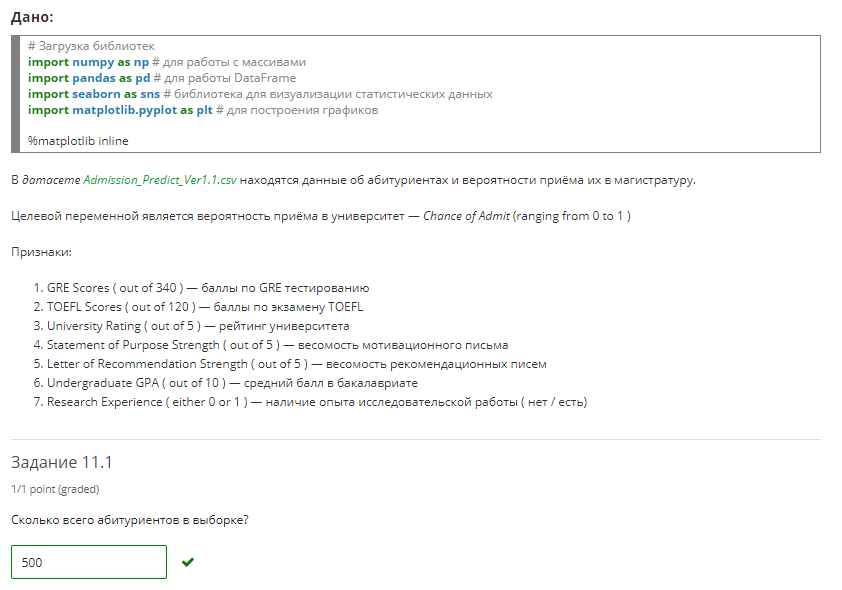

In [16]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

#В датасете Admission_Predict_Ver1.1.csv находятся данные об абитуриентах и вероятности приёма их в магистратуру.
# Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

df = pd.read_csv(r'C:\Users\snkna\Downloads\Admission_Predict_Ver1.1.csv')
print(df.shape)
df

(500, 9)


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

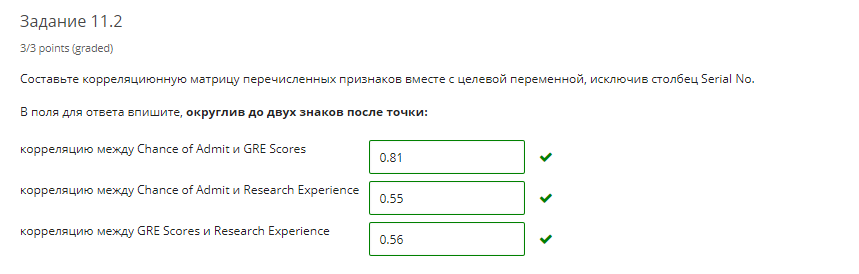

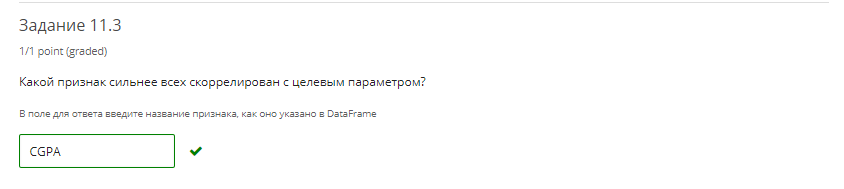

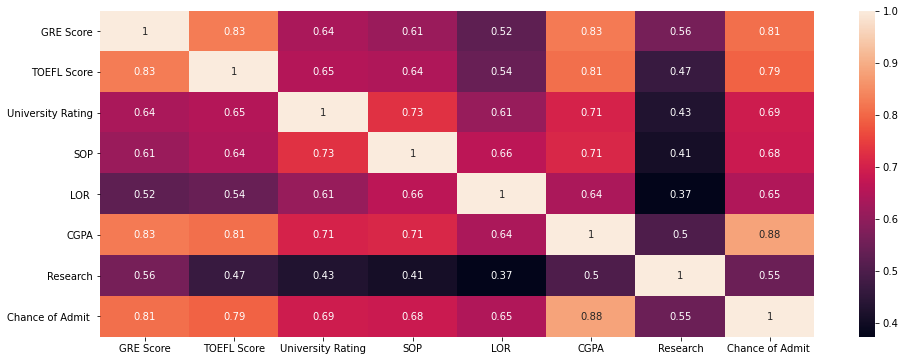

In [17]:
df = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
# полная матрица корреляций
# используем метод Pandas corr()
C = df.corr(method='pearson')
C
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

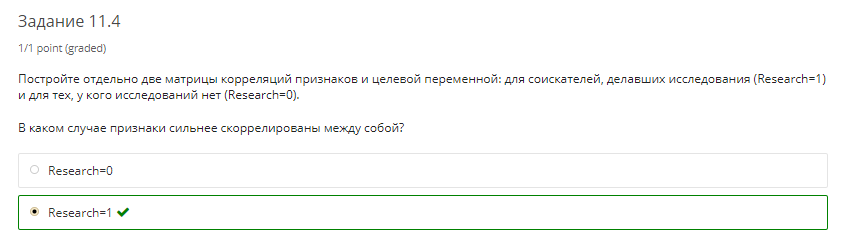

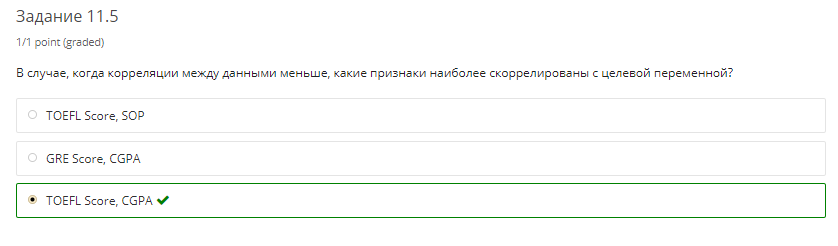

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


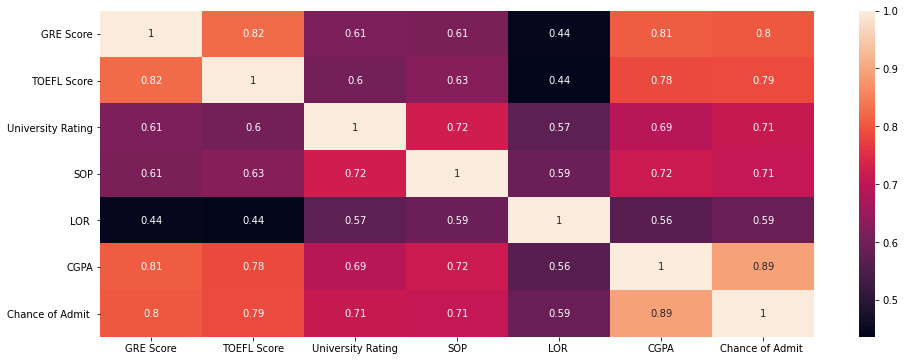

In [18]:
df_yes_research = df.loc[df['Research']==1]
df_yes_research.drop('Research',axis=1,inplace=True)
C = df_yes_research.corr(method='pearson')
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

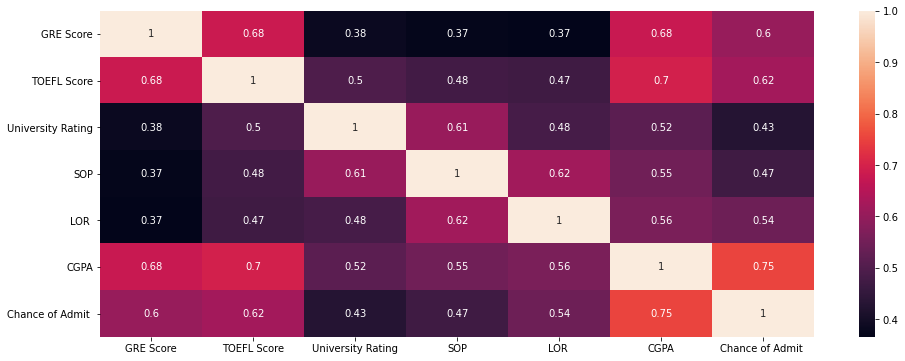

In [19]:
df_no_research = df.loc[df['Research']==0]
df_no_research.drop('Research',axis=1,inplace=True)
CC = df_no_research.corr(method='pearson')
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=CC, annot=True)

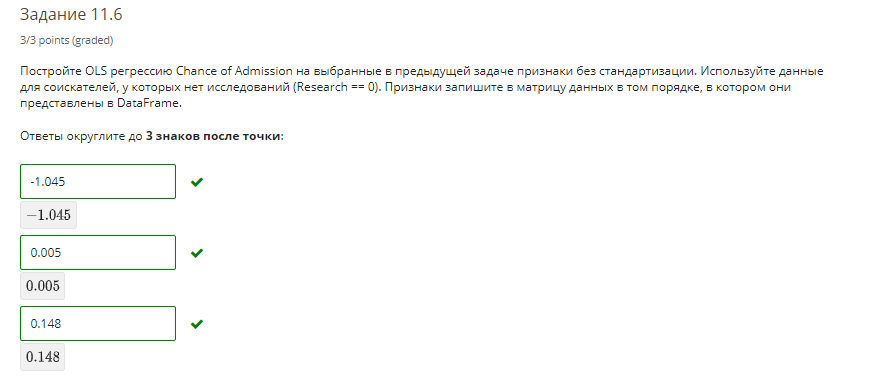

In [20]:
A= np.column_stack((np.ones(220), df_no_research[[ 'TOEFL Score']], df_no_research[['CGPA']]))
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@df_no_research[['Chance of Admit ']]
w_hat

Chance of Admit 
0         -1.044864
1          0.004427
2          0.148077

In [21]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,df_no_research[['Chance of Admit ']],rcond=None)

(array([[-1.04486443],
        [ 0.00442727],
        [ 0.14807744]]),
 array([1.13772786]),
 3,
 array([1548.98055048,    5.02503482,    0.67532963]))

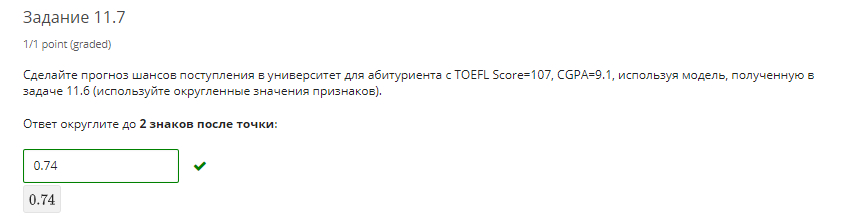

In [23]:
# прогноз
w_hat_round = np.array([-1.045,0.004,0.148])
TOEFL_Score=107
CGPA=9.1
new=np.array([1,TOEFL_Score,CGPA])
round(new@w_hat_round,4)

0.7298

In [24]:
# делаем прогноз типичной соимости дома
Chance_of_Admit_new=round(w_hat.iloc[0],3)+round(w_hat.iloc[1],3)*TOEFL_Score+round(w_hat.iloc[2],3)*CGPA
Chance_of_Admit_new

Chance of Admit     0.7298
dtype: float64

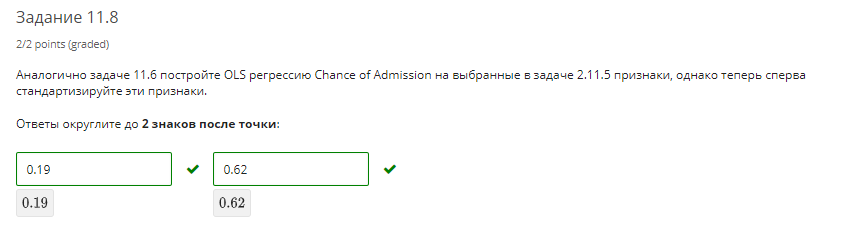

In [25]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanCRIM = df_no_research['TOEFL Score'].mean()
meanRM  = df_no_research['CGPA'].mean()
mean_y = df_no_research['Chance of Admit '].mean()

# Центрирование
CRIM_c = df_no_research['TOEFL Score'] - meanCRIM
RM_c = df_no_research['CGPA'] - meanRM
y_c = df_no_research['Chance of Admit '] - mean_y

# вычисляем длины векторов для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)

# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm


# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
A_st

# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
w_hat

array([0.19044768, 0.62001517])

# Линейный оператор
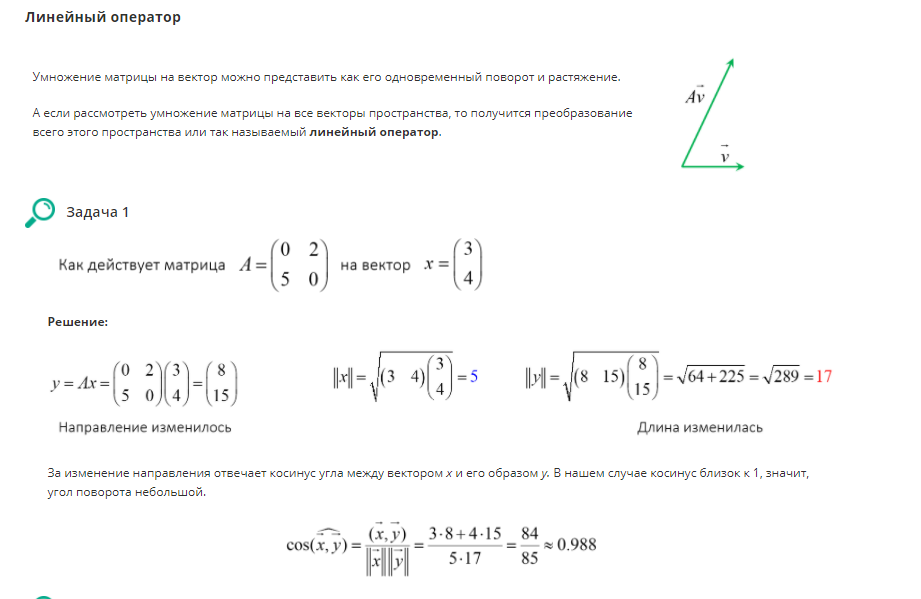

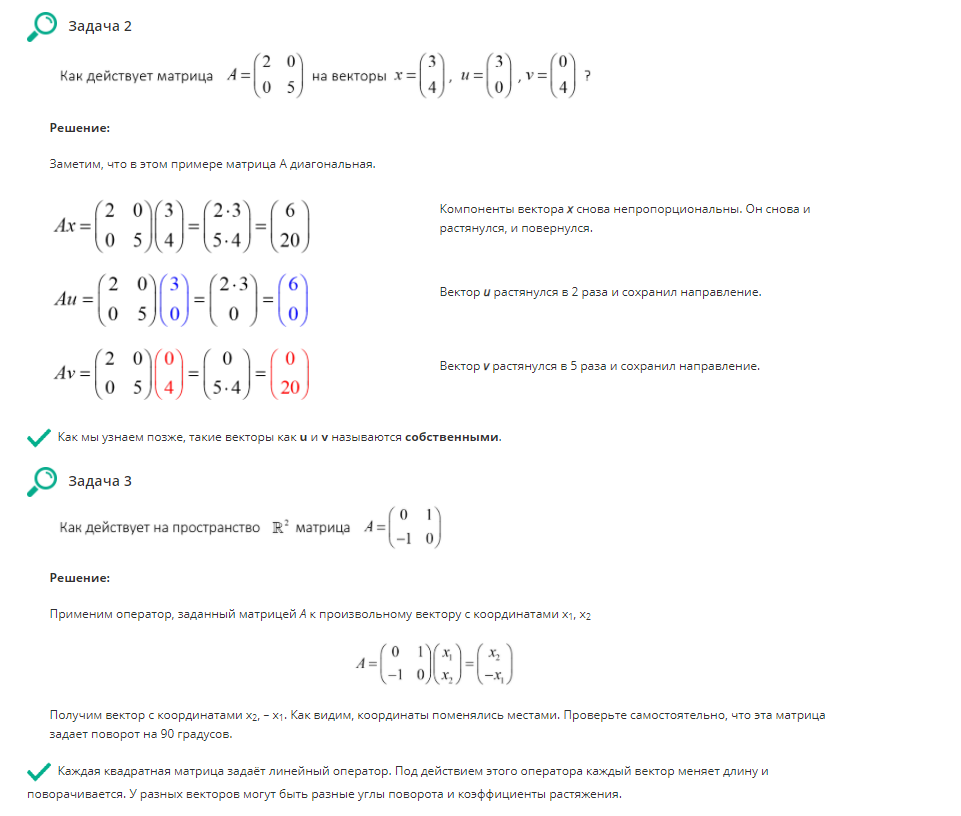

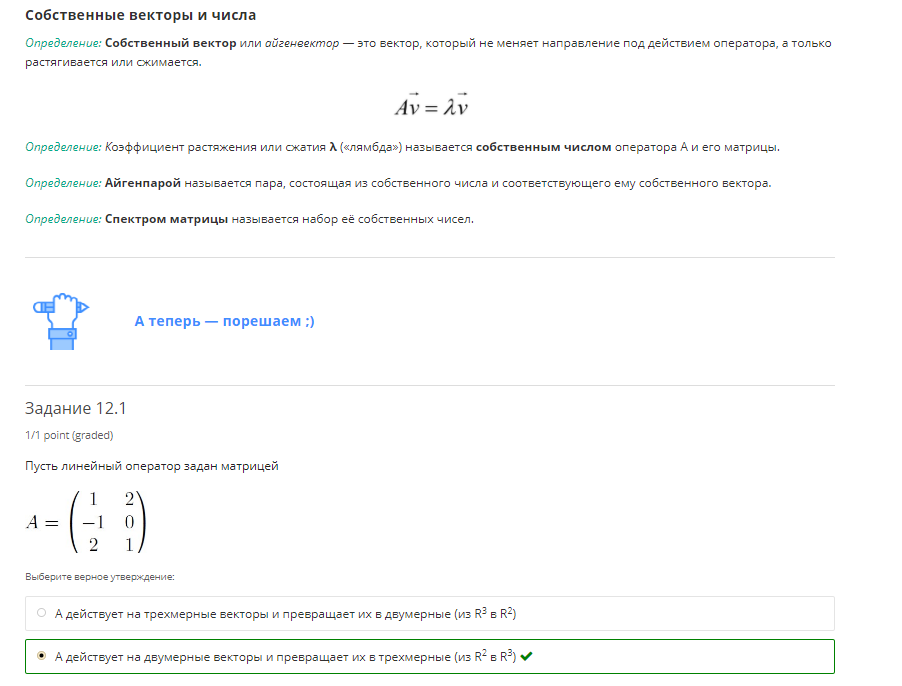

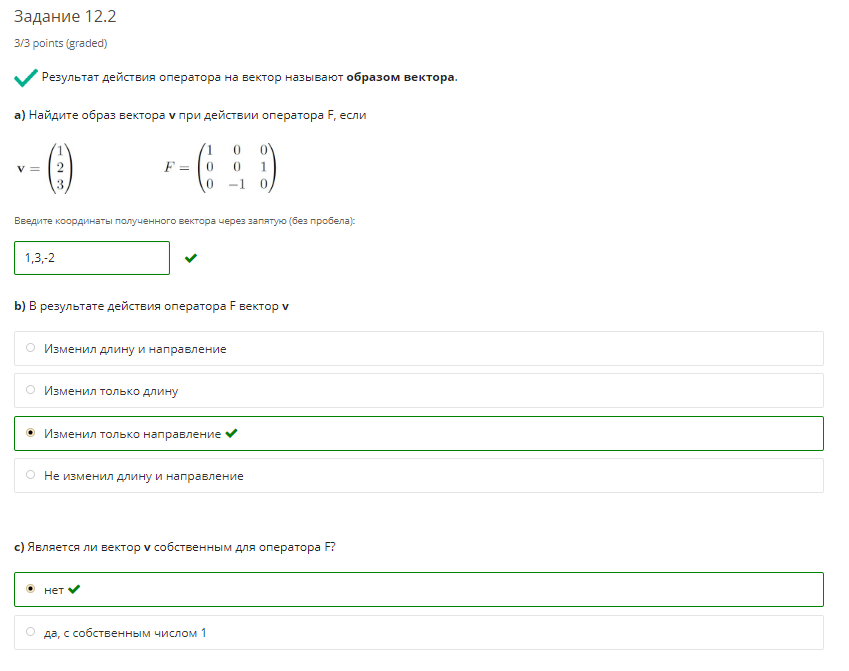

# Собственные векторы и числа
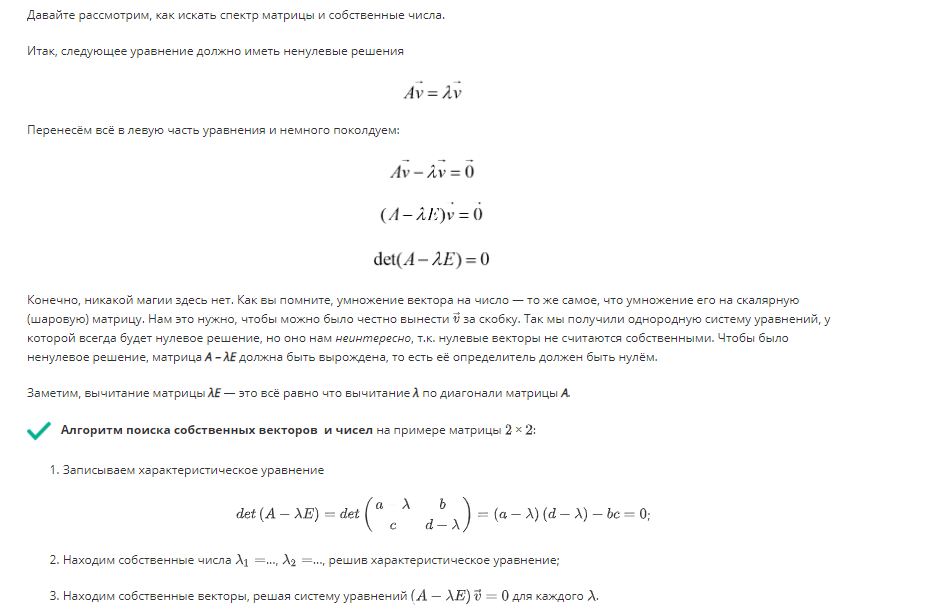

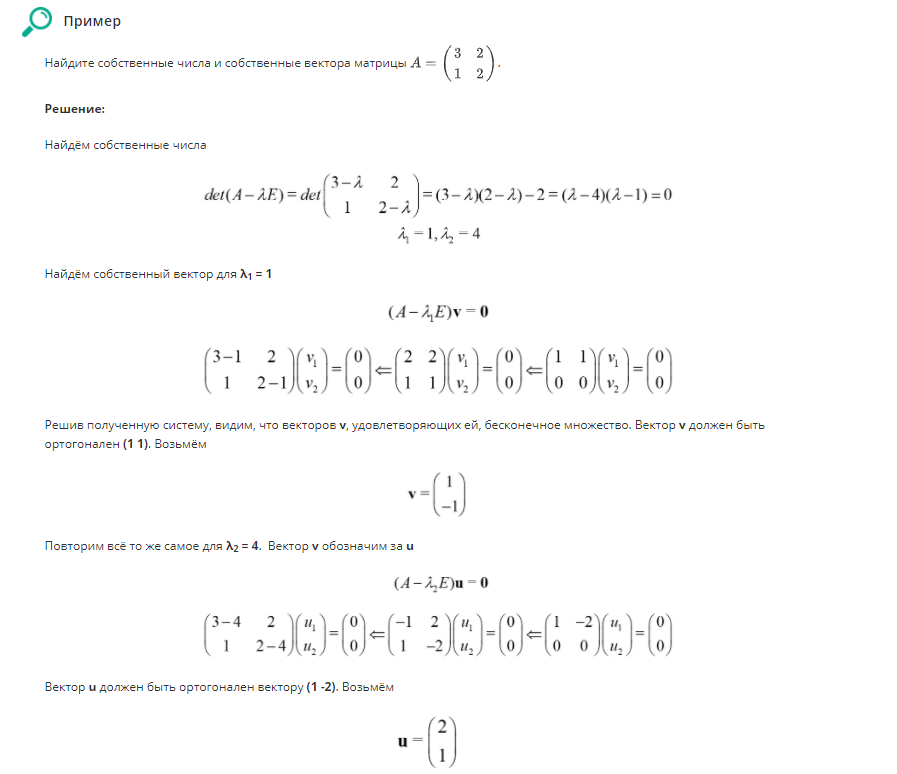

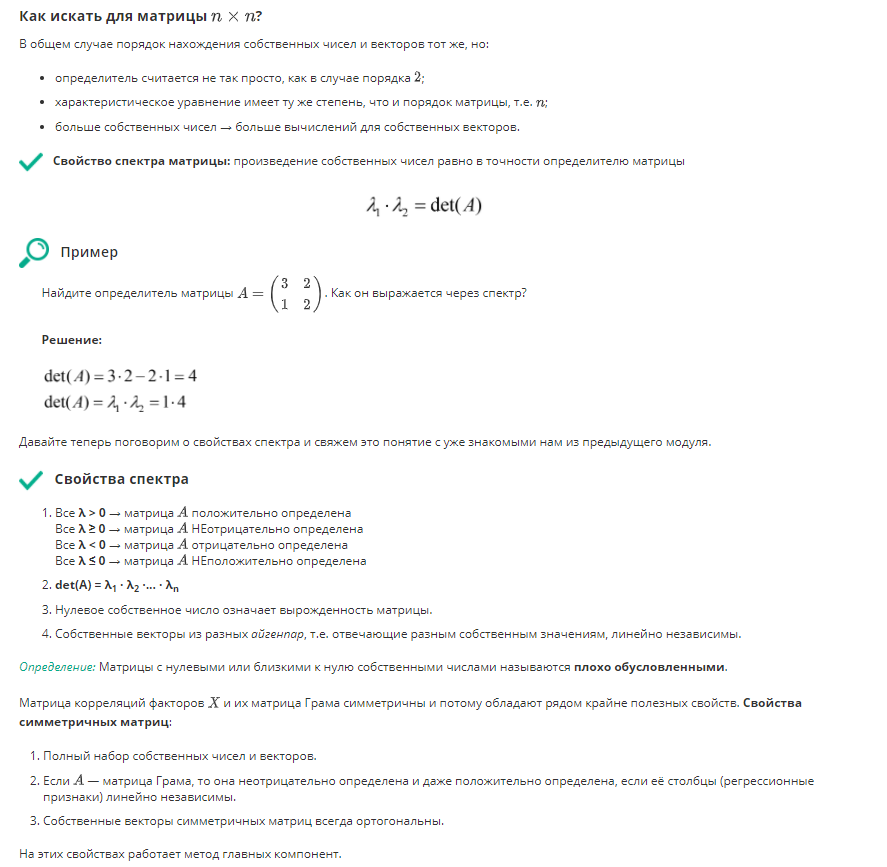

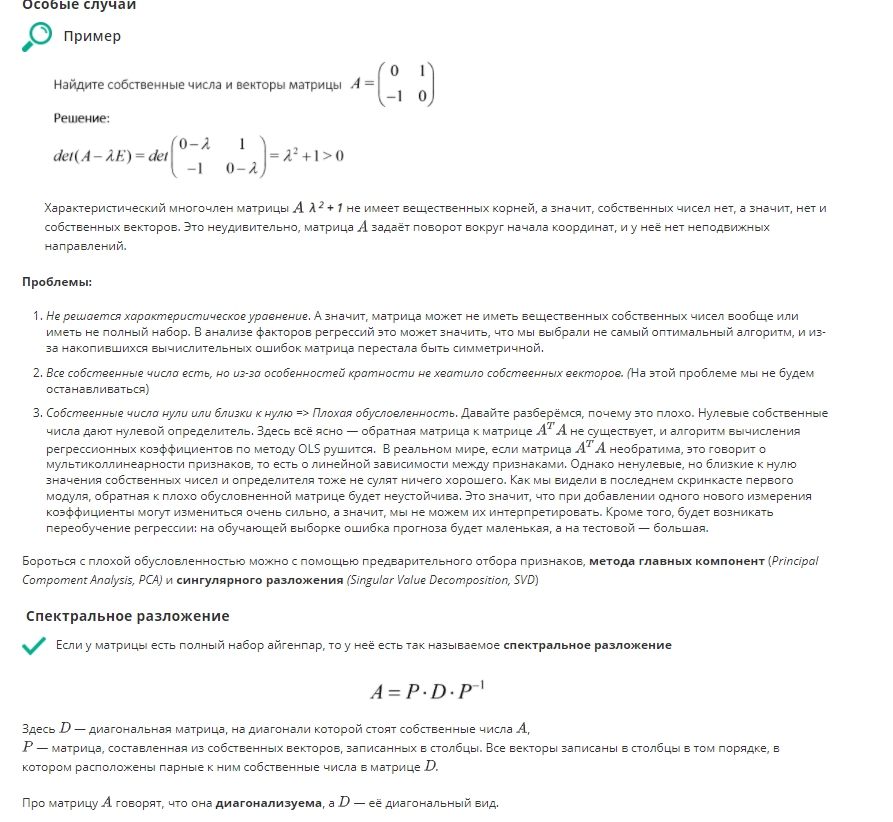

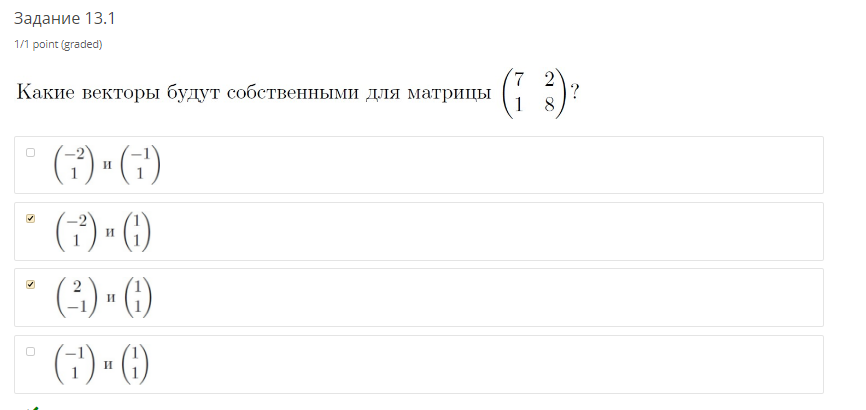

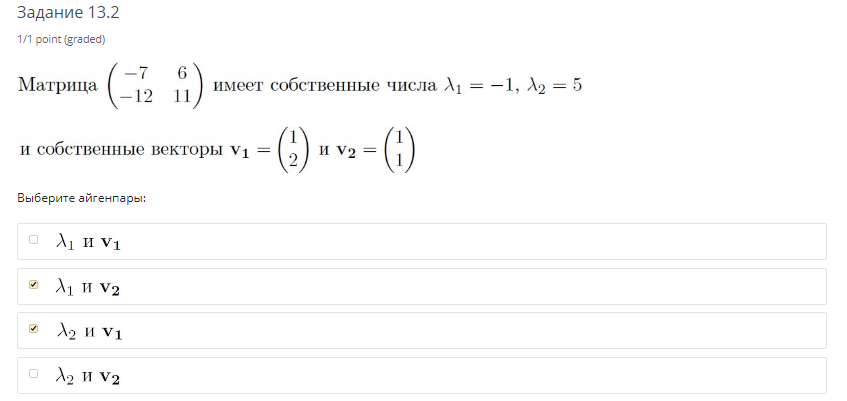

# Практика. Собственные векторы и числа

In [26]:
import numpy as np
A = np.array([[1, 4, 5],
    [-5, 8, 9],
    [-6, 7, 11]]) # создаем матрицу 3х3 
B = np.linalg.eig(A) # находим собственные вектора (с.в.) и собственные числа (с.ч.) через np.linalg.eig
B
# Обратите внимание, что B - кортеж (tuple). Его компоненты имеют тип np.ndarray, с которыми вы уже должны быть знакомы. 
# Нулевая компонента B[0] - вектор собственных чисел, а компонента B[1] - матрица, столбцами которой являются 
# собственные вектора, соответствующие данному числу.; в данном случае собственному числу 13.59373746 
# соответствует собственный вектор [0.45145779, 0.62348353, 0.63832135]

(array([13.59373746,  5.03209301,  1.37416954]),
 array([[ 0.45145779,  0.83661458,  0.10258363],
        [ 0.62348353,  0.44632316, -0.77299039],
        [ 0.63832135,  0.31760303,  0.62606905]]))

In [27]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
print(np.gradient(f,7))

[-0.85714286  0.          0.07142857 -0.21428571  0.21428571  0.
  0.64285714  1.42857143]


In [28]:
a = [4,5,2,3,1]
b = [2,1,4,3,5]
import numpy as np
np.corrcoef(a,b)

array([[ 1., -1.],
       [-1.,  1.]])

# Комплексные числа
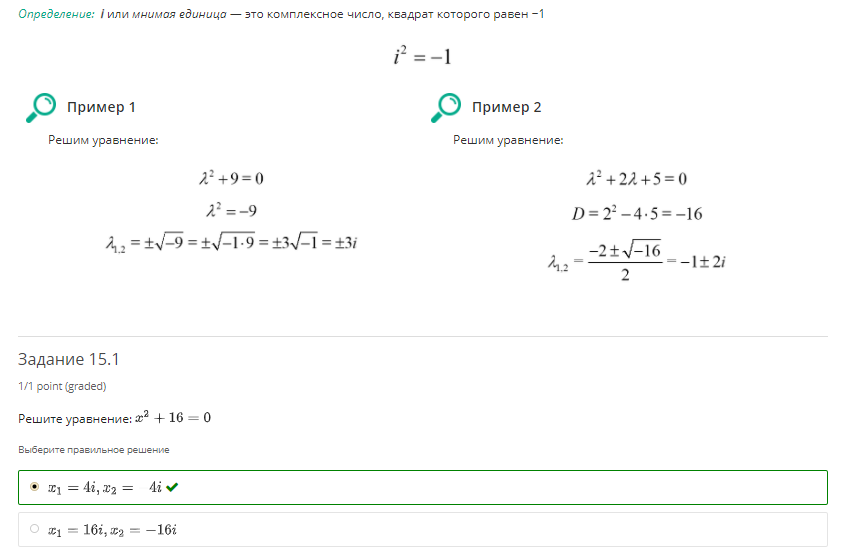

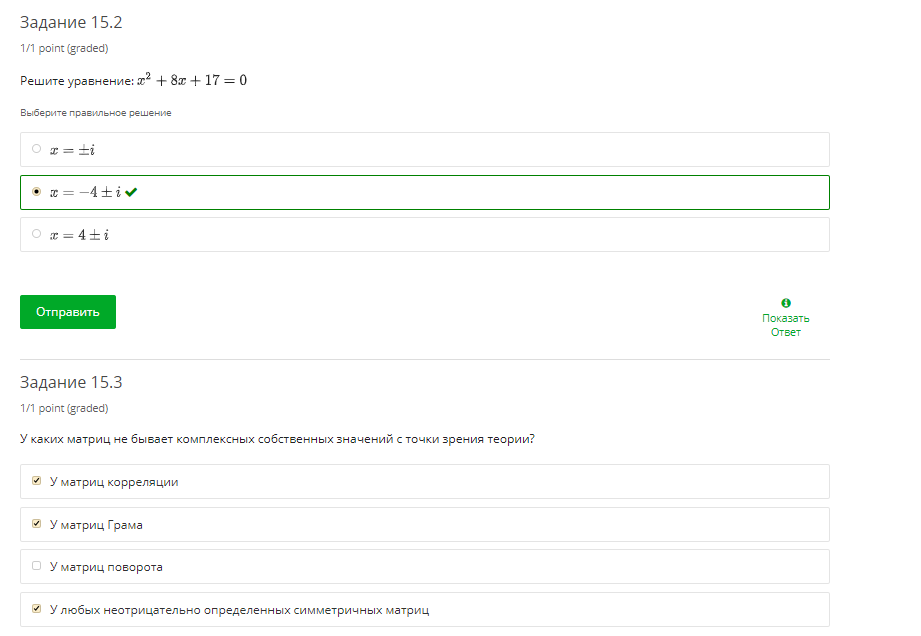

# Доп задача

В этой задаче мы хотим решить задачу линейной регрессии методом OLS.
Мы будем искать оптимальный вектор w для переопределённой системы Aw=y.
Возьмём такую матрицу A (это матрица признаков для квартир - центр/окраина, количество комнат, площадь/10):
0    2    4.5
0    3    5.1
0    1    4.5
1    1    3.0
1    2    4.0
1    3    10.0
Соответствующий вектор цен: y = [245, 351, 145, 630, 740, 900]
Необходимо найти оптимальный вектор весов w для признаков методом OLS.

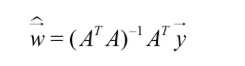

In [29]:
A = np.array([[1,0,2,4.5],[1,0,3,5.1],[1,0,1,4.5],[1,1,1,3],[1,1,2,4],[1,1,3,10]])
print(A)
y = np.array([245, 351, 145, 630, 740, 900])
print(y)
C = np.dot(A.T,A)
print(C)
D = np.dot(np.linalg.inv(C),A.T)
AA = (A - np.mean(A, axis=0)) / np.std(A, axis=0)
print(AA)
AA = AA[:,1:].copy()
CC = np.dot(AA.T,AA)
DD = np.dot(np.linalg.inv(CC),AA.T)
np.dot(DD,y)

[[ 1.   0.   2.   4.5]
 [ 1.   0.   3.   5.1]
 [ 1.   0.   1.   4.5]
 [ 1.   1.   1.   3. ]
 [ 1.   1.   2.   4. ]
 [ 1.   1.   3.  10. ]]
[245 351 145 630 740 900]
[[  6.     3.    12.    31.1 ]
 [  3.     3.     6.    17.  ]
 [ 12.     6.    28.    69.8 ]
 [ 31.1   17.    69.8  191.51]]
[[        nan -1.          0.         -0.30403754]
 [        nan -1.          1.22474487 -0.03707775]
 [        nan -1.         -1.22474487 -0.30403754]
 [        nan  1.         -1.22474487 -0.971437  ]
 [        nan  1.          0.         -0.52650403]
 [        nan  1.          1.22474487  2.14309385]]


<ipython-input-29-5c8802d2b388>:8: RuntimeWarning: invalid value encountered in true_divide
  AA = (A - np.mean(A, axis=0)) / np.std(A, axis=0)


array([250.        ,  81.64965809,  22.47529508])

# Дополнительные материалы
В качестве дополнения рекомендуем вам ознакомиться со следующими источниками:

[Пример возникновения комплексных чисел в регрессиях](https://habr.com/ru/company/ods/blog/322076/)\
[«Введение в комплексные числа»](https://habr.com/ru/post/354548/)\
[«Операции над комплексными числами»](https://habr.com/ru/post/429316/)

В качестве дополнительных материалов рекомендуем ознакомиться со следующими источниками:

[«Matrix calculator»](https://matrixcalc.org/) — калькулятор для линейной алгебры. Это очень полезный инструмент, который не только считает матрицы по заданным условиям, но и даёт пошаговое решение с объяснением. Тем не менее, мы настоятельно рекомендуем считать матрицы самостоятельно и только проверять себя по этому калькулятору!\
[«Essence of linear algebra»](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) — раздел, посвященный линейной алгебре, на канале 3blue1brown. Канал англоязычный, но есть субтитры. Хорошая возможность познакомиться с англоязычной терминологией.\
[«3blue1brown Русский перевод»](https://www.youtube.com/channel/UC6hAYNOWMmuqOBvFOuAFKwA) — часть видео с канала 3blue1brown переведена на русский язык.